In [1]:
from pathlib import Path

import matplotlib as mpl

# mpl.use("pdf")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from gsd_utils import papermode

papermode(plt=plt, size=8)

# width as measured in inkscape
width = 3.281
height = width / 1.618

In [2]:
# Paths
data_path = Path.cwd().parent / "data"
gsddat_folder = data_path / "gsds" / "val"
results_dir = Path.cwd() / "results"
patch_resdir = results_dir / "phase2" / "patchsize"

test_path = patch_resdir / "test"
val_path = patch_resdir / "val"

figs_path = Path("figs") / "patch-overlap"
figs_path.mkdir(exist_ok=True, parents=True)

In [9]:
test_df = pd.read_csv(test_path / "phase2-test-patchsize.csv").rename(
    columns={
        "Patch Size": "patch_size",
        "Overlap": "overlap",
    }
)
test_df["type"] = "test"
test_df["overlap"] /= 100
val_df = pd.read_csv(val_path / "phase2-val-patchsize.csv").rename(
    columns={
        "Patch Size": "patch_size",
        "Overlap": "overlap",
    }
)
val_df["type"] = "val"
val_df["overlap"] /= 100

df = pd.concat([val_df, test_df]).set_index(["patch_size", "overlap", "type"])

df.to_csv(patch_resdir / "metrics-patch-overlap.csv")

                           mIoU    pAcc      F1
patch_size overlap type                        
144        0.75    val   0.3212  0.5515  0.4125
           0.85    val   0.3264  0.5619  0.4175
           0.95    val   0.3268  0.5637  0.4178
           0.75    test  0.3005  0.4882  0.4029
           0.85    test  0.3005  0.4952  0.4018
           0.95    test  0.3022  0.4977  0.4036
   overlap  type    mIoU    pAcc      F1
0     0.75   val  0.3212  0.5515  0.4125
1     0.85   val  0.3264  0.5619  0.4175
2     0.95   val  0.3268  0.5637  0.4178
3     0.75  test  0.3005  0.4882  0.4029
4     0.85  test  0.3005  0.4952  0.4018
5     0.95  test  0.3022  0.4977  0.4036
144                            mIoU    pAcc      F1
patch_size overlap type                        
144        0.75    val   0.3212  0.5515  0.4125
           0.85    val   0.3264  0.5619  0.4175
           0.95    val   0.3268  0.5637  0.4178
           0.75    test  0.3005  0.4882  0.4029
           0.85    test  0.3005  0.49

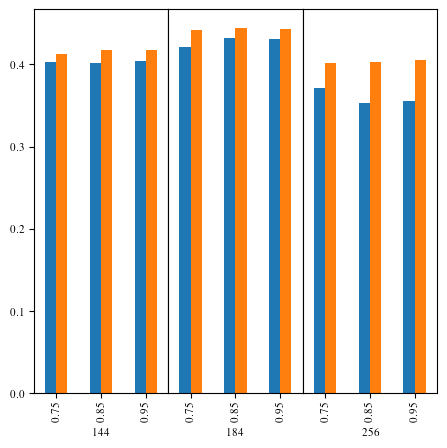

In [26]:
fig, axs = plt.subplots(ncols=3, sharey=True)
fig.subplots_adjust(left=0.17, bottom=0.17, right=0.80, top=0.97, wspace=0)

patch_groups = df.groupby(level="patch_size", as_index=False)
for ax, (patch_size, patch_df) in zip(axs, patch_groups):
    # print(patch_df, patch_df.droplevel("patch_size").index)
    print(patch_df, patch_df.droplevel(0).reset_index(),sep="\n")

    patch_df.droplevel("patch_size").F1.unstack(1).plot(
        kind="bar",
        ax=ax,
        legend=False,
    )
    print(patch_size, patch_df)
    ax.set_xlabel(patch_size)

axs[1].tick_params(left=False)
axs[2].tick_params(left=False)